In [ ]:
pip install opencv-python pandas seaborn

Note: you may need to restart the kernel to use updated packages.


### Setup

In [2]:
import pandas as pd
from IPython.display import display 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import cv2
import os
import seaborn as sns
from datetime import datetime

### Creating datapaths

In [47]:
path= r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_d17_teste_door(object2)_1DLC_Resnet50_top_viewMay29shuffle1_snapshot_110.csv"
df = pd.read_csv(path, header=[1, 2])

video_path = r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_d17_teste_door(object2)_1.mp4"
cap = cv2.VideoCapture(video_path) 

stim_timestamps = r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_d17_teste_door(object2)_stim_ON_OFF_timestamps.csv"
stim_df = pd.read_csv(stim_timestamps, header=[0])

### Dataframe segmentation

##### Stim window

In [48]:
def get_seg_stim(df, stim_on, stim_off, fps=30, i=0):
    start_sec = stim_on[i]
    end_sec = stim_off[i]
        
    start_frame = start_sec * fps
    end_frame = end_sec * fps
        
    segmento = df[(df.index >= start_frame) & (df.index <= end_frame)]

    return segmento

In [49]:
stim1 = get_seg_stim(df, stim_df['stim_ON'], stim_df['stim_OFF'], fps=30, i=0)
stim2 = get_seg_stim(df, stim_df['stim_ON'], stim_df['stim_OFF'], fps=30, i=1)
stim3 = get_seg_stim(df, stim_df['stim_ON'], stim_df['stim_OFF'], fps=30, i=2)
stim4 = get_seg_stim(df, stim_df['stim_ON'], stim_df['stim_OFF'], fps=30, i=3)

In [50]:
stim1_sorted = stim1.sort_index()
stim2_sorted = stim2.sort_index()
stim3_sorted = stim3.sort_index()
stim4_sorted = stim4.sort_index()

stims_array = np.stack([
    stim1_sorted.values,
    stim2_sorted.values,
    stim3_sorted.values,
    stim4_sorted.values
])

mean_rows = np.mean(stims_array, axis=0)

df_seg_stim = pd.DataFrame(mean_rows, index=stim1_sorted.index, columns=stim1_sorted.columns)

mean_rows_vector = mean_rows

In [51]:
df_seg_stim

bodyparts        nose                           forehead              \
        coords           x           y likelihood           x           y   
5401   13501.0  160.403687  304.131720   0.472776  165.674875  306.062550   
5402   13502.0  160.716680  304.649458   0.464500  174.405528  302.699617   
5403   13503.0  176.389231  300.860717   0.465585  175.206625  302.266210   
5404   13504.0  177.273260  298.649140   0.481679  176.122830  301.192160   
5405   13505.0  178.002743  300.103455   0.478323  176.419772  302.086503   
...        ...         ...         ...        ...         ...         ...   
5996   14096.0  234.542178  228.782310   0.409021  170.779103  259.551850   
5997   14097.0  232.494675  227.321990   0.432950  166.558443  245.210853   
5998   14098.0  232.312128  225.739643   0.414692  168.972714  246.712887   
5999   14099.0  160.930077  255.208150   0.392919  165.938298  245.493890   
6000   14100.0  150.721925  236.634187   0.398741  162.262088  240.647527   

                      R_ear                         ...      L_ear  \
     likelihood           x           y likelihood  ... likelihood   
5401   0.603959  142.479144  299.529697   0.771840  ...   0.939889   
5402   0.599563  142.514287  300.227933   0.800407  ...   0.984261   
5403   0.606735  141.940143  300.263322   0.805293  ...   0.979710   
5404   0.619242  141.889007  299.738213   0.792548  ...   0.982474   
5405   0.655986  142.256317  299.752360   0.799113  ...   0.990930   
...         ...         ...         ...        ...  ...        ...   
5996   0.637992  177.742717  239.806805   0.803811  ...   0.940907   
5997   0.637925  176.407580  236.567702   0.824789  ...   0.957337   
5998   0.641136  175.788612  235.504500   0.772466  ...   0.912673   
5999   0.692431  170.259285  235.024420   0.763560  ...   0.900054   
6000   0.717917  168.304980  232.093130   0.858026  ...   0.961505   

            head                               body                         \
               x           y likelihood           x           y likelihood   
5401  164.212807  288.921042   1.000000  127.306158  225.446350   0.647780   
5402  164.154265  288.610883   1.000000  127.062466  225.330457   0.623379   
5403  164.818610  288.134265   1.000000  125.914704  226.522615   0.621688   
5404  164.991928  287.440567   1.000000  124.785920  227.429268   0.642275   
5405  164.398460  287.122427   1.000000  126.058820  226.804805   0.679636   
...          ...         ...        ...         ...         ...        ...   
5996  184.871590  249.534793   0.969587  202.989808  229.397610   0.310036   
5997  181.947053  247.479013   0.971372  181.831457  218.421953   0.359833   
5998  180.883258  246.465685   0.971558  181.302080  218.008945   0.386222   
5999  177.185574  244.554550   1.000000  201.628300  225.536300   0.292221   
6000  173.221525  240.005565   1.000000  197.789187  222.836563   0.377595   

            tail                         
               x           y likelihood  
5401  155.465124  211.293835   0.344267  
5402  154.190405  211.757046   0.327308  
5403  154.359490  211.684999   0.324904  
5404  154.783402  211.879337   0.305411  
5405  131.477982  205.457026   0.280354  
...          ...         ...        ...  
5996  252.777367  206.960017   0.265605  
5997  253.429905  207.684330   0.328194  
5998  253.404833  208.685648   0.297073  
5999  253.371602  219.973975   0.269075  
6000  254.466667  219.034657   0.284684  

[600 rows x 22 columns]

### Box area selection

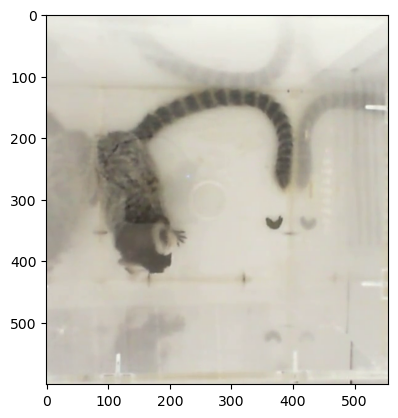

In [52]:
cap = cv2.VideoCapture(video_path) 
numOfFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
chosenFrameIdx = np.random.randint(1, high=numOfFrames)
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
res, chosenFrame = cap.read()

original_height, original_width, _ = chosenFrame.shape
display_max_width = 600
ratio = display_max_width / original_width
display_height = int(original_height * ratio)

frame_for_selection = cv2.resize(chosenFrame, (display_max_width, display_height))

roi_small = cv2.selectROI('Select the arena, then press space and enter', frame_for_selection) 

x_scale = original_width / display_max_width
y_scale = original_height / display_height

roi_original_scale = (
    int(roi_small[0] * x_scale),
    int(roi_small[1] * y_scale),
    int(roi_small[2] * x_scale),
    int(roi_small[3] * y_scale)
)

roi_cropped = chosenFrame[int(roi_original_scale[1]):int(roi_original_scale[1]+roi_original_scale[3]), int(roi_original_scale[0]):int(roi_original_scale[0]+roi_original_scale[2])]
plt.imshow(cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0) 
cv2.destroyAllWindows()

arenaSide = (roi_original_scale[2] + roi_original_scale[3]) / 2 
xThresholdLeft = roi_original_scale[0]
xThresholdRight = roi_original_scale[0] + arenaSide
yThresholdUp = roi_original_scale[1]
yThresholdDown = roi_original_scale[1] + arenaSide

##### Select stim area

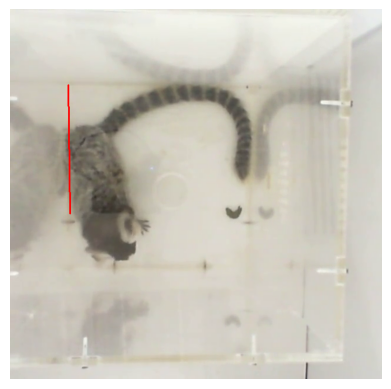

In [53]:
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
res, chosenFrame = cap.read()

original_height, original_width, _ = chosenFrame.shape
display_max_width = 700
ratio = display_max_width / original_width
display_height = int(original_height * ratio)

frame_for_selection = cv2.resize(chosenFrame, (display_max_width, display_height))

x1, y1, x2, y2 = cv2.selectROI('Selecione a linha (clique e arraste)', frame_for_selection, fromCenter=False, showCrosshair=True)
cv2.destroyAllWindows()

x_scale = original_width / display_max_width
y_scale = original_height / display_height

pt1 = (int(x1 * x_scale), int(y1 * y_scale))
pt2 = (int((x1 + x2) * x_scale), int((y1 + y2) * y_scale))

frame_with_line = chosenFrame.copy()
cv2.line(frame_with_line, pt1, pt2, (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(frame_with_line, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### Convert pixel to cm

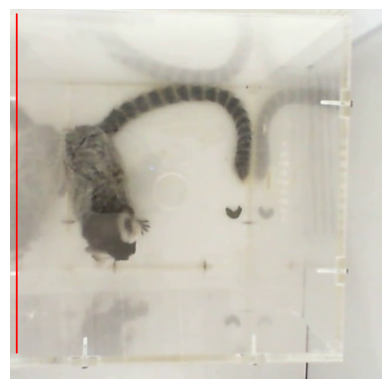

Pixels per cm: 22.21153846153846


In [55]:
py1 = yThresholdDown 
py2 = yThresholdUp
px = xThresholdLeft

frame_with_line = chosenFrame.copy()
cv2.line(frame_with_line, (px, int(py1)), (px, int(py2)), (0, 0, 255), 2)  
frame_with_line_rgb = cv2.cvtColor(frame_with_line, cv2.COLOR_BGR2RGB)
plt.imshow(frame_with_line_rgb)
plt.axis('off') 
plt.show()

pix_per_cm = (py1-py2) / 26 # 26 cm é a distância entre os dois pontos
print(f"Pixels per cm: {pix_per_cm}")

### Filter coordinates

In [56]:
body_x = df[('body', 'x')].values
body_y = df[('body', 'y')].values
head_x = df[('head', 'x')].values
head_y = df[('head', 'y')].values
nose_x = df[('nose', 'x')].values
nose_y = df[('nose', 'y')].values

body_x_filt = np.where((body_x >= xThresholdLeft) & (body_x <= xThresholdRight), body_x, np.nan)    
body_y_filt = np.where((body_y >= yThresholdUp) & (body_y <= yThresholdDown), body_y, np.nan)
head_x_filt = np.where((head_x >= xThresholdLeft) & (head_x <= xThresholdRight), head_x, np.nan)
head_y_filt = np.where((head_y >= yThresholdUp) & (head_y <= yThresholdDown), head_y, np.nan)
nose_x_filt = np.where((nose_x >= xThresholdLeft) & (nose_x <= xThresholdRight), nose_x, np.nan)
nose_y_filt = np.where((nose_y >= yThresholdUp) & (nose_y <= yThresholdDown), nose_y, np.nan)

body_x_cm = body_x_filt / pix_per_cm
body_y_cm = body_y_filt / pix_per_cm
head_x_cm = head_x_filt  / pix_per_cm
head_y_cm = head_y_filt  / pix_per_cm
nose_x_cm = nose_x_filt  / pix_per_cm
nose_y_cm = nose_y_filt  / pix_per_cm
pt1x = pt1[0]/pix_per_cm
pt1y = pt1[1]/pix_per_cm
pt2x = pt2[0]/pix_per_cm
pt2y = pt2[1]/pix_per_cm


mask_combined = (
    ~np.isnan(body_x_cm) & 
    ~np.isnan(body_y_cm) &
    ~np.isnan(head_x_cm) & 
    ~np.isnan(head_y_cm) &
    ~np.isnan(nose_x_cm) & 
    ~np.isnan(nose_y_cm)
)

body_x = body_x_cm[mask_combined]
body_y = body_y_cm[mask_combined]
head_x = head_x_cm[mask_combined]
head_y = head_y_cm[mask_combined]
nose_x = nose_x_cm[mask_combined]
nose_y = nose_y_cm[mask_combined]

body_x = pd.Series(body_x).rolling(window=15, min_periods=1, center=True).mean().values
body_y = pd.Series(body_y).rolling(window=15, min_periods=1, center=True).mean().values
head_x = pd.Series(head_x).rolling(window=15, min_periods=1, center=True).mean().values
head_y = pd.Series(head_y).rolling(window=15, min_periods=1, center=True).mean().values
nose_x = pd.Series(nose_x).rolling(window=15, min_periods=1, center=True).mean().values
nose_y = pd.Series(nose_y).rolling(window=15, min_periods=1, center=True).mean().values

### Polar plot config

In [57]:
dx = nose_x - head_x
dy = nose_y - head_y
fps = 30

angles_rad = np.arctan2(dy, dx)
angles_deg = (np.degrees(angles_rad) + 360) % 360

bin_size = 20 
bins = np.arange(0, 361, bin_size)
counts, bin_edges = np.histogram(angles_deg, bins=bins)
bin_centers_deg = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2
theta = np.deg2rad(bin_centers_deg)

radii = counts/fps
width = np.deg2rad(bin_size)
colors = plt.cm.viridis(radii / np.max(radii))

In [58]:
def total_displacement(df, bodypart='body'):
    x = df[(bodypart, 'x')].values
    y = df[(bodypart, 'y')].values
    dx = np.diff(x)
    dy = np.diff(y)
    displacement = np.sqrt(dx**2 + dy**2)
    return np.nansum(displacement)

In [61]:
total_displacement_body = total_displacement(df, bodypart='body')
total_displacement_head = total_displacement(df, bodypart='head')

display(total_displacement_body)

272299.3770910391

In [43]:
angles_deg = angles_deg.mean()


### Plot and save

In [15]:
figures_to_save = {}

timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M')
animal_name = 'Fiona'
condition = 'aversive'

filename1 = f'histograma_{animal_name}_{condition}_{timestamp}.png'
filename2 = f'heatmap_{animal_name}_{condition}_{timestamp}.png'
filename3 = f'tracking_{animal_name}_{condition}_{timestamp}.png'
filename4 = f'polar_{animal_name}_{condition}_{timestamp}.png'
filename5 = f'direction_{animal_name}_{condition}_{timestamp}.png'

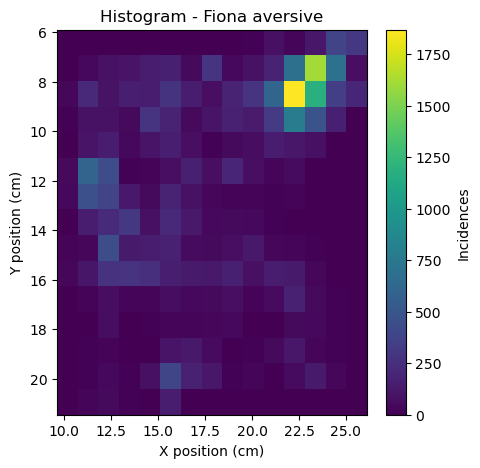

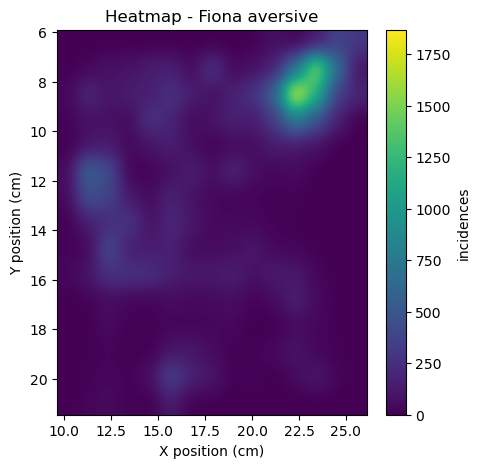

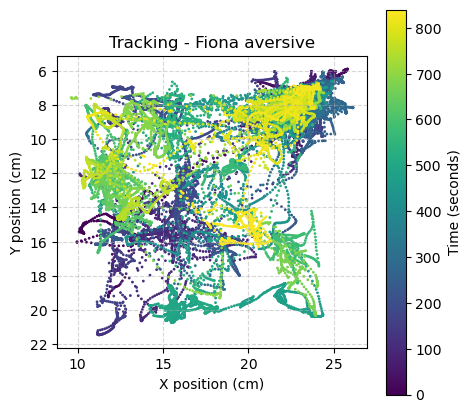

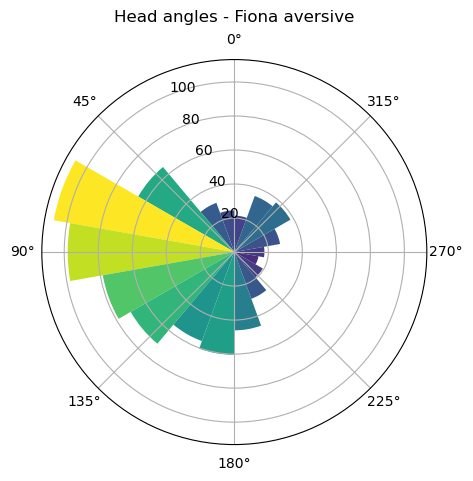

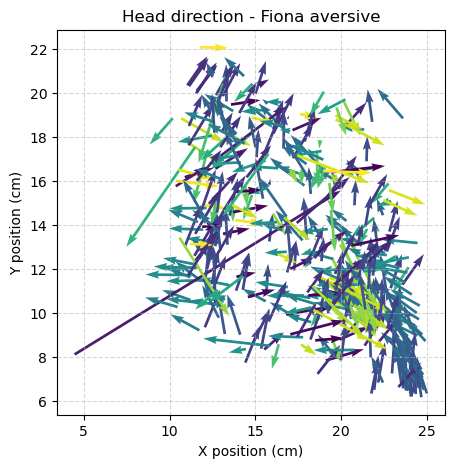

In [16]:
fps = 30

fig1, ax1 = plt.subplots(figsize=(5, 5))
mappable = ax1.hist2d(body_x, body_y, bins=15)[3]
ax1.set_title('Histogram - ' + animal_name +' '+ condition)
ax1.set_xlabel('X position (cm)')
ax1.set_ylabel('Y position (cm)')
fig1.colorbar(mappable, ax=ax1, label='Incidences')
ax1.invert_yaxis()
figures_to_save[filename1] = fig1

fig2, ax2 = plt.subplots(figsize=(5, 5))
h, xedges, yedges = np.histogram2d(body_x, body_y, bins=15)
im = ax2.imshow(h.T, origin='lower', cmap='viridis',
               interpolation='gaussian',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
               aspect='auto', vmin=0, vmax=np.max(h))
fig2.colorbar(im, ax=ax2, label='incidences', orientation='vertical', shrink=1.0)
ax2.set_title('Heatmap - ' + animal_name +' '+ condition)
ax2.set_xlabel('X position (cm)')
ax2.set_ylabel('Y position (cm)')
ax2.invert_yaxis()
figures_to_save[filename2] = fig2

fig3, ax3 = plt.subplots(figsize=(5, 5))
time = np.arange(len(body_x))/fps
scatter = ax3.scatter(body_x, body_y, c=time, s=1, cmap='viridis')
fig3.colorbar(scatter, ax=ax3, label='Time (seconds)')
ax3.set_title('Tracking - ' + animal_name +' '+ condition)
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.set_xlabel('X position (cm)')
ax3.set_ylabel('Y position (cm)')
ax3.set_aspect('equal', adjustable='box')
ax3.invert_yaxis()
figures_to_save[filename3] = fig3

fig4, ax4 = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
ax4.bar(theta, radii, width=width, bottom=0.0, color=colors)
ax4.set_theta_zero_location('N')  
ax4.set_theta_direction(1)     
ax4.set_title('Head angles - ' + animal_name +' '+ condition, va='bottom')
plt.show()
figures_to_save[filename4] = fig4

fig5, ax5 = plt.subplots(figsize=(5, 5))
f = 60
ax5.quiver(head_x[::f], head_y[::f],
           dx[::f], dy[::f],
           angles_deg[::f], scale=20, cmap='viridis', width=0.007)
ax5.set_title('Head direction - ' + animal_name +' '+ condition)
ax5.set_xlabel('X position (cm)')
ax5.set_ylabel('Y position (cm)')
ax5.grid(True, linestyle='--', alpha=0.5)
plt.show()
figures_to_save[filename5] = fig5

In [67]:
folder_name = animal_name +' '+ condition
os.makedirs(folder_name, exist_ok=True)

for filename, fig_object in figures_to_save.items():
        full_path = os.path.join(folder_name, filename)

        fig_object.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"- Figura '{filename}' salva com sucesso.")

- Figura 'histograma_Fiona_aversive_2025-08-12_11-32.png' salva com sucesso.
- Figura 'heatmap_Fiona_aversive_2025-08-12_11-32.png' salva com sucesso.
- Figura 'tracking_Fiona_aversive_2025-08-12_11-32.png' salva com sucesso.
- Figura 'polar_Fiona_aversive_2025-08-12_11-32.png' salva com sucesso.
- Figura 'direction_Fiona_aversive_2025-08-12_11-32.png' salva com sucesso.


##### Plot sobre frame


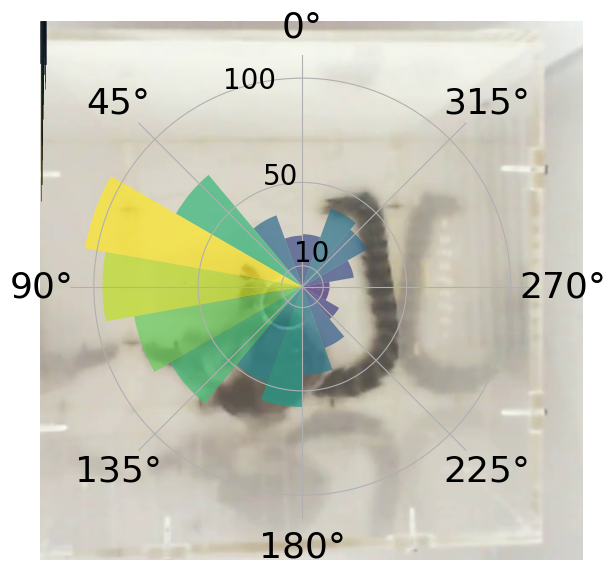

In [16]:
# Selecionar um frame do vídeo (por exemplo, o mesmo usado para seleção da arena)
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
_, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(frame_rgb)
ax.axis('off')

# Coordenadas do centro do plot polar (em pixels)
center_x = int(original_width // 2)
center_y = int(original_height // 2)

# Definir raio máximo para o plot polar (em pixels)
max_radius = min(original_width, original_height) // 3

# Normalizar radii para caber no raio máximo
radii_norm = radii / np.max(radii) * max_radius

# Plotar barras polares sobre a imagem
for th, r, c in zip(theta, radii_norm, colors):
    ax.bar(
        th, r, width=width, bottom=0.0,
        color=c, alpha=0.7,
        edgecolor='k',
        linewidth=0.5
    )

# Ajustar o plot polar para o centro da imagem
polar_ax = fig.add_axes([0, 0, 1, 1], polar=True, frameon=False)
polar_ax.set_position([
    (center_x - max_radius) / original_width,
    (center_y - max_radius) / original_height,
    2 * max_radius / original_width,
    2 * max_radius / original_height
])
polar_ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.7)
polar_ax.set_theta_zero_location('N')
polar_ax.set_theta_direction(1)


# --- AJUSTE DO TAMANHO DAS FONTES ---

# 1. Ajustar a fonte dos rótulos angulares (0°, 90°, etc.)
# Usamos 'tick_params' para controlar a aparência dos 'ticks'
polar_ax.tick_params(axis='x', labelsize=26, pad=10) # 'pad' aumenta a distância do rótulo ao gráfico

# 2. Ajustar a fonte dos rótulos radiais (os números nos raios)
# Primeiro, definimos as posições dos ticks radiais

polar_ax.set_rticks([10, 50, 100]) # Ex: ticks exatamente nesses valores


# Em seguida, ajustamos a fonte desses rótulos
polar_ax.tick_params(axis='y', labelsize=20)

plt.show()

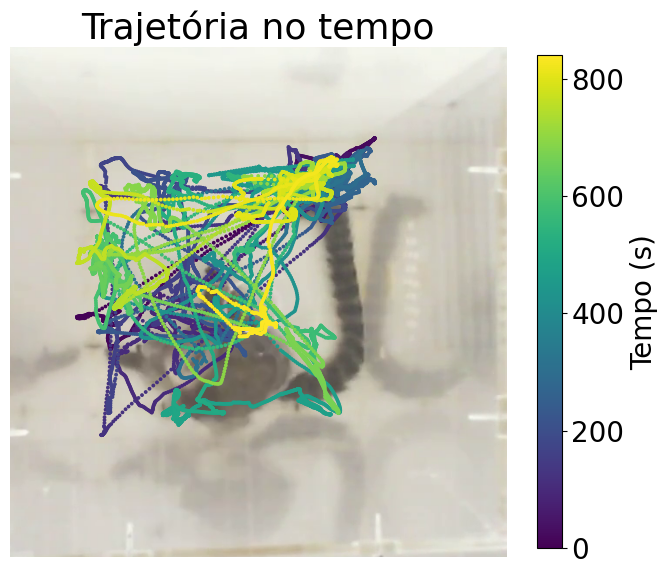

In [17]:
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
success, frame = cap.read()

body_x_pixels = body_x * pix_per_cm
body_y_pixels = body_y * pix_per_cm 

arena_offset_x = -160 
arena_offset_y = -30

body_x_adjusted = body_x_pixels + arena_offset_x
body_y_adjusted = body_y_pixels + arena_offset_y
        

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2RGB))

time = np.arange(len(body_x_adjusted)) / fps
scatter = ax.scatter(body_x_adjusted, body_y_adjusted, c=time, s=3, cmap='viridis')

cbar = fig.colorbar(scatter, ax=ax, label='Tempo (s)', shrink=0.8, orientation='vertical')
cbar.set_label('Tempo (s)', fontsize=20)
cbar.ax.tick_params(labelsize=20)
        
 
ax.set_title('Trajetória no tempo', fontsize=26)
ax.axis('off')
        
plt.show()

##### Single plot

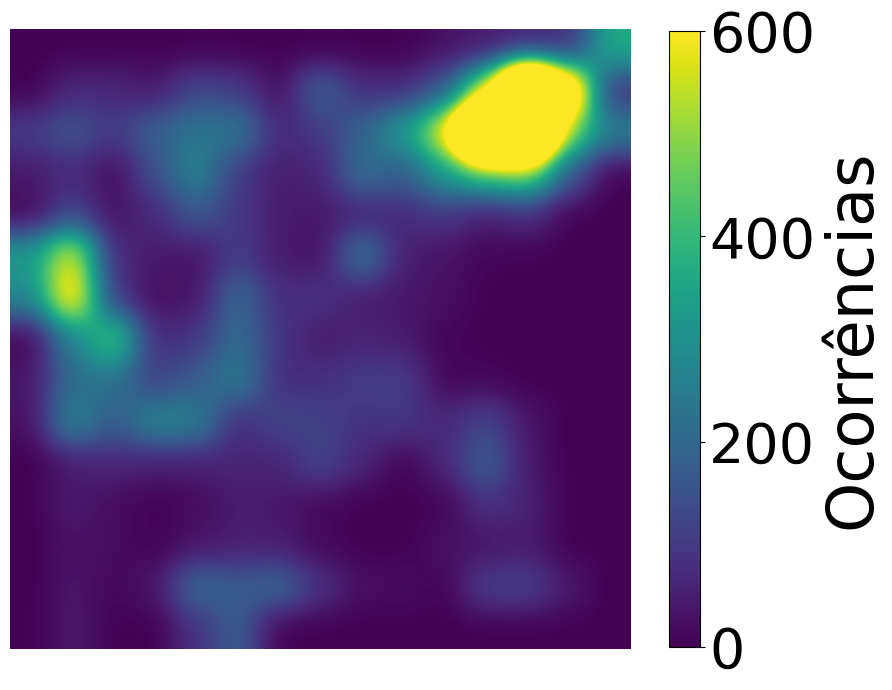

In [121]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(10, 10))
h, xedges, yedges = np.histogram2d(body_x, body_y, bins=15)

im = ax.imshow(h.T, origin='lower', cmap='viridis',
               interpolation='gaussian',
               vmin=0, vmax=600)

cbar = fig.colorbar(im, ax=ax, label='Ocorrências', orientation='vertical', shrink=0.8)

cbar.set_label('Ocorrências', fontsize=46)
cbar.ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
cbar.ax.tick_params(labelsize=40)

ax.invert_yaxis()
ax.axis('off')

plt.show()

##### Plot behaviors

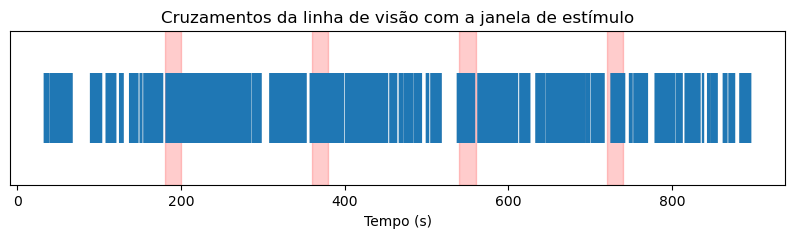

In [438]:
def find_gaze_intersection(head_point, nose_point, line_p1, line_p2):
    """
    Calcula a interseção entre o raio da visão (cabeça->nariz) e um segmento de linha.
    Retorna True se a interseção for válida, caso contrário, False.
    """
    h_x, h_y = head_point
    n_x, n_y = nose_point
    l1_x, l1_y = line_p1
    l2_x, l2_y = line_p2

    gaze_dx = n_x - h_x
    gaze_dy = n_y - h_y
    line_dx = l2_x - l1_x
    line_dy = l2_y - l1_y

    determinant = gaze_dx * line_dy - gaze_dy * line_dx

    # Se as linhas são paralelas, não há interseção.
    if determinant == 0:
        return False

    # --- FÓRMULA CORRIGIDA PARA 'u' ---
    # Calcula 't' (distância ao longo do raio da visão)
    t = ((l1_x - h_x) * line_dy - (l1_y - h_y) * line_dx) / determinant
    # --- LÓGICA DE VERIFICAÇÃO UNIFICADA E CORRIGIDA ---
    # Retorna True apenas se AMBAS as condições forem satisfeitas.
    if t >= 0:
        return True
    else:
        return False

# --- DADOS DE EXEMPLO ---

# --- LOOP PRINCIPAL AJUSTADO ---
crossings = []

# Itera sobre os arrays de trajetória já filtrados e suavizados
for i in range(len(head_x)):
    head_pt = (head_x[i], head_y[i])
    nose_pt = (nose_x[i], nose_y[i])
    
    # A nova função verifica a interseção diretamente
    intersection = find_gaze_intersection(head_pt, nose_pt, (pt1x, pt1y), (pt2x, pt2y))
    
    crossings.append(intersection)

crossings = np.array(crossings)

fps = 30.0

plt.figure(figsize=(10, 2))
times = np.arange(len(crossings)) / fps
plt.eventplot(times[crossings == 1], orientation='horizontal')
plt.xlabel('Tempo (s)')
plt.yticks([])
for _, row in stim_df.iterrows():
    plt.axvspan(row['stim_ON'], row['stim_OFF'], color='red', alpha=0.2)
plt.title('Cruzamentos da linha de visão com a janela de estímulo')
plt.show()

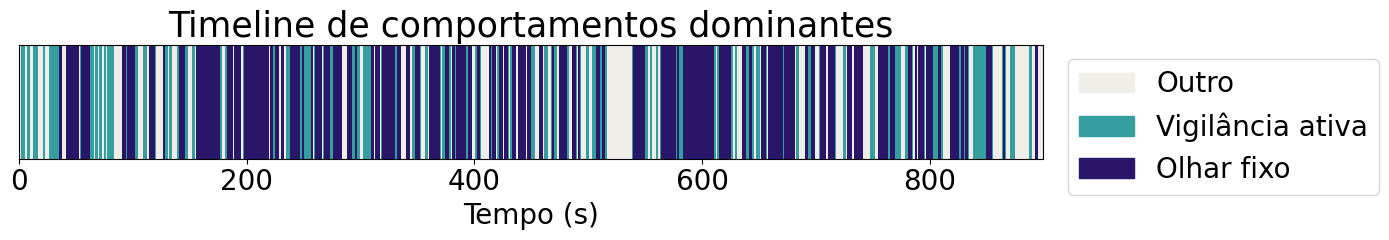

In [439]:

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def calcular_vigilancia_ativa(head_x, head_y, nose_x, nose_y, fps, limiar_velocidade_graus=3.0):
    angulos_rad = np.arctan2(nose_y - head_y, nose_x - head_x)
    diff_angulos = np.diff(angulos_rad)
    diff_angulos[diff_angulos > np.pi] -= 2 * np.pi
    diff_angulos[diff_angulos < -np.pi] += 2 * np.pi
    
    velocidade_angular_rad_s = diff_angulos * fps
    velocidade_angular_graus_s = np.rad2deg(velocidade_angular_rad_s)
    
    vigilancia_ativa = np.abs(velocidade_angular_graus_s) > limiar_velocidade_graus
    
    return np.insert(vigilancia_ativa, 0, False)

def encontrar_periodos_filtrados(boolean_array, fps, duracao_minima_s):
    periodos_frames = []
    if duracao_minima_s <= 0: return periodos_frames

    em_periodo = False
    inicio_frame = 0
    padded_array = np.append(boolean_array, 0)

    for i, status in enumerate(padded_array):
        if not em_periodo and status == 1:
            em_periodo = True
            inicio_frame = i
        elif em_periodo and status == 0:
            em_periodo = False
            fim_frame = i
            duracao_frames = fim_frame - inicio_frame
            if (duracao_frames / fps) >= duracao_minima_s:
                periodos_frames.append((inicio_frame, fim_frame))
    return periodos_frames

def criar_timeline_comportamental_filtrada(crossings_array, vigilancia_ativa_array, fps, duracao_minima_s=2.0):
    """Cria a timeline final onde comportamentos são filtrados e mutuamente exclusivos."""
    n_frames = len(crossings_array)
    timeline_final = np.zeros(n_frames, dtype=int)

    # Encontrar os períodos válidos e filtrados para cada comportamento
    periodos_vigilancia = encontrar_periodos_filtrados(vigilancia_ativa_array, fps, duracao_minima_s)
    periodos_olhar_fixo = encontrar_periodos_filtrados(crossings_array, fps, duracao_minima_s)

    # Marcar a "Vigilância Ativa" primeiro
    for inicio, fim in periodos_vigilancia:
        timeline_final[inicio:fim] = 1

    # Marcar o "Olhar Fixo" com prioridade (sobrescreve a vigilância)
    for inicio, fim in periodos_olhar_fixo:
        timeline_final[inicio:fim] = 2

    return timeline_final

# ==============================================================================
# 2. FUNÇÃO DE PLOTAGEM
# ==============================================================================

def plotar_timeline_comportamental(timeline_array, fps):
    """Plota a timeline de comportamentos como uma única barra colorida."""
    fig, ax = plt.subplots(figsize=(14, 2.5))
    
    cores = {0: "#efeee9", 1: "#359E9E", 2: "#2A1669"}
    labels = {0: 'Outro', 1: 'Vigilância ativa', 2: 'Olhar fixo'}
    
    cmap = ListedColormap([cores[i] for i in sorted(cores.keys())])
    dados_plot = np.expand_dims(timeline_array, axis=0)
    
    ax.imshow(dados_plot, aspect='auto', cmap=cmap, interpolation='none')
    
    locs = np.arange(0, len(timeline_array) + 1, int(200* fps)) # Marca a cada 10 segundos
    ax.set_xticks(locs)
    ax.set_xticklabels([f'{l/fps:.0f}' for l in locs], fontsize=20)
    ax.set_xlabel('Tempo (s)', fontsize=20)
    
    ax.get_yaxis().set_visible(False)
    ax.set_title('Timeline de comportamentos dominantes', fontsize=25)

    legend_patches = [mpatches.Patch(color=cores[i], label=labels[i]) for i in sorted(cores.keys())]
    ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.01, 1.0), fontsize=20)

    plt.tight_layout()
    plt.show()


# Parâmetros necessários (assumindo que já foram definidos nas células anteriores)
fps = 30.0
DURACAO_MINIMA_COMPORTAMENTO = 2.0

# Passo 1: Calcular o comportamento de vigilância ativa
vigilancia_ativa_bool = calcular_vigilancia_ativa(head_x, head_y, nose_x, nose_y, fps, limiar_velocidade_graus=3.0)

# Passo 2: Criar a timeline final com a lógica de filtro e prioridade
timeline_final_filtrada = criar_timeline_comportamental_filtrada(
    crossings, 
    vigilancia_ativa_bool, 
    fps, 
    duracao_minima_s=DURACAO_MINIMA_COMPORTAMENTO
)

# Passo 3: Plotar a visualização da timeline final
plotar_timeline_comportamental(timeline_final_filtrada, fps)

##### Video plot

In [164]:
body_x = df[('body', 'x')].values
body_y = df[('body', 'y')].values
head_x = df[('head', 'x')].values
head_y = df[('head', 'y')].values
nose_x = df[('nose', 'x')].values
nose_y = df[('nose', 'y')].values

body_x_filt = np.where((body_x >= xThresholdLeft) & (body_x <= xThresholdRight), body_x, np.nan)    
body_y_filt = np.where((body_y >= yThresholdUp) & (body_y <= yThresholdDown), body_y, np.nan)
head_x_filt = np.where((head_x >= xThresholdLeft) & (head_x <= xThresholdRight), head_x, np.nan)
head_y_filt = np.where((head_y >= yThresholdUp) & (head_y <= yThresholdDown), head_y, np.nan)
nose_x_filt = np.where((nose_x >= xThresholdLeft) & (nose_x <= xThresholdRight), nose_x, np.nan)
nose_y_filt = np.where((nose_y >= yThresholdUp) & (nose_y <= yThresholdDown), nose_y, np.nan)

body_x_cm = body_x_filt / pix_per_cm
body_y_cm = body_y_filt / pix_per_cm
head_x_cm = head_x_filt  / pix_per_cm
head_y_cm = head_y_filt  / pix_per_cm
nose_x_cm = nose_x_filt  / pix_per_cm
nose_y_cm = nose_y_filt  / pix_per_cm
pt1x = pt1[0]/pix_per_cm
pt1y = pt1[1]/pix_per_cm
pt2x = pt2[0]/pix_per_cm
pt2y = pt2[1]/pix_per_cm


mask_combined = (
    ~np.isnan(body_x_cm) & 
    ~np.isnan(body_y_cm) &
    ~np.isnan(head_x_cm) & 
    ~np.isnan(head_y_cm) &
    ~np.isnan(nose_x_cm) & 
    ~np.isnan(nose_y_cm)
)

body_x = body_x_cm[mask_combined]
body_y = body_y_cm[mask_combined]
head_x = head_x_cm[mask_combined]
head_y = head_y_cm[mask_combined]
nose_x = nose_x_cm[mask_combined]
nose_y = nose_y_cm[mask_combined]

body_x = pd.Series(body_x).rolling(window=15, min_periods=1, center=True).mean().values
body_y = pd.Series(body_y).rolling(window=15, min_periods=1, center=True).mean().values
head_x = pd.Series(head_x).rolling(window=15, min_periods=1, center=True).mean().values
head_y = pd.Series(head_y).rolling(window=15, min_periods=1, center=True).mean().values
nose_x = pd.Series(nose_x).rolling(window=15, min_periods=1, center=True).mean().values
nose_y = pd.Series(nose_y).rolling(window=15, min_periods=1, center=True).mean().values

In [ ]:
start_time_seconds = 140
end_time_seconds = 235

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from datetime import datetime

# --- 1. DADOS DE ENTRADA E CONFIGURAÇÕES ---

# Assumimos que estas variáveis já foram carregadas e transformadas
# Exemplo de transformação que você forneceu:
body_x = body_x * pix_per_cm + arena_offset_x
body_y = body_y * pix_per_cm + arena_offset_y
head_x = head_x * pix_per_cm + arena_offset_x
head_y = head_y * pix_per_cm + arena_offset_y
nose_x = nose_x * pix_per_cm + arena_offset_x
nose_y = nose_y * pix_per_cm + arena_offset_y

# Janela de tempo em segundos
start_time_seconds = 180
end_time_seconds = 182

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Erro: Não foi possível abrir o arquivo de vídeo. Verifique o caminho.")
else:
    # Coleta de propriedades do vídeo
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_video_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Cálculo dos frames de início e fim
    start_frame = int(start_time_seconds * fps)
    end_frame = int(end_time_seconds * fps) if end_time_seconds != -1 else total_video_frames - 1
    
    # Validação para garantir que os frames estão dentro dos limites
    if start_frame >= total_video_frames:
        print(f"Erro: O tempo de início ({start_time_seconds}s) é maior que a duração do vídeo.")
        cap.release()
    elif end_frame >= len(body_x):
        print(f"Aviso: A janela de tempo excede a duração dos dados. Ajustando para o final dos dados.")
        end_frame = len(body_x) - 1
    else:
        # Se tudo estiver OK, configura o vídeo para começar no frame certo
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

        # Configuração do vídeo de saída
        output_video_name = f"video_com_trajetoria_final_{datetime.now().strftime('%Y-%m-%d_%H-%M')}.mp4"
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        plot_width = 400
        total_width = width + plot_width
        out = cv2.VideoWriter(output_video_name, fourcc, fps, (total_width, height))

        # --- TELA PERSISTENTE PARA A TRAJETÓRIA ---
        # Cria uma "tela" preta onde o caminho será desenhado e acumulado
        path_canvas = np.zeros((height, width, 3), dtype=np.uint8)
        last_point = None

        frame_count = start_frame
        
        # Loop principal para processar cada frame
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret or frame_count > end_frame:
                break
            
            cor_de_fundo_bgr = (211, 211, 211)
            combined_frame = np.full((height, total_width, 3), cor_de_fundo_bgr, dtype=np.uint8)

            current_body_x, current_body_y = body_x[frame_count], body_y[frame_count]
            
            # Apenas desenha se os dados do frame atual forem válidos
            if np.isfinite(current_body_x) and np.isfinite(current_body_y):
                current_head_x, current_head_y = head_x[frame_count], head_y[frame_count]
                current_nose_x, current_nose_y = nose_x[frame_count], nose_y[frame_count]

                body_pos = (int(current_body_x), int(current_body_y))
                
                current_point = body_pos
                if last_point is not None:
                    # Desenha um segmento de linha na tela da trajetória
                    cv2.line(path_canvas, last_point, current_point, color=(60, 20, 220), thickness=3)
                last_point = current_point
                
                # Sobrepõe a tela com a trajetória no frame do vídeo
                frame = cv2.add(frame, path_canvas)
                
                fig_dir, ax_dir = plt.subplots(figsize=(2, 2), subplot_kw={'projection': 'polar'})
                fig_dir.patch.set_facecolor('white')
                ax_dir.set_facecolor('white')
                angle = np.arctan2(current_nose_y - current_head_y, current_nose_x - current_head_x)
                ax_dir.plot([0, angle], [0, 1], color='red', linewidth=3)
                ax_dir.set_rmax(1)
                ax_dir.grid(True)
                ax_dir.set_yticklabels([])
                
                fig_dir.canvas.draw()
                plot_img_dir = np.frombuffer(fig_dir.canvas.tostring_rgb(), dtype=np.uint8)
                plot_img_dir = plot_img_dir.reshape(fig_dir.canvas.get_width_height()[::-1] + (3,))
                plot_img_dir = cv2.cvtColor(plot_img_dir, cv2.COLOR_RGB2BGR)
                plt.close(fig_dir)
                
                # Cria o frame combinado final
                combined_frame = np.zeros((height, total_width, 3), dtype=np.uint8)
                combined_frame[:, :width] = frame # Frame com a trajetória já desenhada
                
                plot_h, plot_w, _ = plot_img_dir.shape
                combined_frame[50:50+plot_h, width+50:width+50+plot_w] = plot_img_dir
                
                out.write(combined_frame)

            frame_count += 1

        # Finaliza o processo
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        print(f"Vídeo '{output_video_name}' salvo com sucesso!")

C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\1490246772.py:100: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig_dir.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\1490246772.py:100: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig_dir.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\1490246772.py:100: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig_dir.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\1490246772.py:100: MatplotlibDeprecationWarning: The tostring_rgb function was depre

Vídeo 'video_com_trajetoria_final_2025-08-14_19-15.mp4' salvo com sucesso!


C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\1490246772.py:100: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig_dir.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\1490246772.py:100: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig_dir.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\1490246772.py:100: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig_dir.canvas.tostring_rgb(), dtype=np.uint8)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from datetime import datetime

# --- 1. DADOS DE ENTRADA E CONFIGURAções ---

# Assumimos que estas variáveis já foram carregadas e transformadas
# Exemplo de transformação que você forneceu:
body_x = body_x * pix_per_cm + arena_offset_x
body_y = body_y * pix_per_cm + arena_offset_y
head_x = head_x * pix_per_cm + arena_offset_x
head_y = head_y * pix_per_cm + arena_offset_y
nose_x = nose_x * pix_per_cm + arena_offset_x
nose_y = nose_y * pix_per_cm + arena_offset_y

# Janela de tempo em segundos
start_time_seconds = 175
end_time_seconds = 190

# Caminho do vídeo
# Certifique-se que a variável video_path está definida
# video_path = "caminho/para/seu/video.mp4"

# --- 2. PROCESSAMENTO DO VÍDEO ---

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Erro: Não foi possível abrir o arquivo de vídeo. Verifique o caminho.")
else:
    # Coleta de propriedades do vídeo
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_video_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Cálculo dos frames de início e fim
    start_frame = int(start_time_seconds * fps)
    end_frame = int(end_time_seconds * fps) if end_time_seconds != -1 else total_video_frames - 1
    
    # Validação para garantir que os frames estão dentro dos limites
    if start_frame >= total_video_frames:
        print(f"Erro: O tempo de início ({start_time_seconds}s) é maior que a duração do vídeo.")
        cap.release()
    elif end_frame >= len(body_x):
        print(f"Aviso: A janela de tempo excede a duração dos dados. Ajustando para o final dos dados.")
        end_frame = len(body_x) - 1
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

        # Configuração do vídeo de saída
        output_video_name = f"video_angulo_corrigido_{datetime.now().strftime('%Y-%m-%d_%H-%M')}.mp4"
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        plot_width = 1200 
        total_width = width + plot_width
        out = cv2.VideoWriter(output_video_name, fourcc, fps, (total_width, height))

        # Tela persistente para a trajetória e lista para os ângulos
        path_canvas = np.zeros((height, width, 3), dtype=np.uint8)
        head_angles = []
        last_point = None
        frame_count = start_frame
        
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret or frame_count > end_frame:
                break

            current_body_x, current_body_y = body_x[frame_count], body_y[frame_count]
            
            # --- Atualiza e desenha a trajetória ---
            if np.isfinite(current_body_x) and np.isfinite(current_body_y):
                current_point = (int(current_body_x), int(current_body_y))
                if last_point is not None:
                    cv2.line(path_canvas, last_point, current_point, color=(0, 0, 225), thickness=3, lineType=cv2.LINE_AA)
                last_point = current_point
            else:
                last_point = None

            video_frame = cv2.add(frame, path_canvas)
            
            combined_frame = np.zeros((height, total_width, 3), dtype=np.uint8)
            combined_frame[:, :width] = video_frame

            # --- Gera e adiciona os gráficos ---
            current_head_x, current_head_y = head_x[frame_count], head_y[frame_count]
            current_nose_x, current_nose_y = nose_x[frame_count], nose_y[frame_count]
            
            if np.isfinite(current_head_x) and np.isfinite(current_nose_x):
                # ### MUDANÇA PRINCIPAL AQUI ###
                # Invertemos o sinal da diferença em Y para corrigir o espelhamento.
                # (current_head_y - current_nose_y) em vez de (current_nose_y - current_head_y)
                angle = np.arctan2(current_head_y - current_nose_y, current_nose_x - current_head_x)
                head_angles.append(angle)
                
                # Cria figura com 2 subplots
                fig, (ax_polar, ax_hist) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(8, 4))
                fig.patch.set_facecolor('white')

                # Gráfico 1: Direção atual (à esquerda)
                ax_polar.set_facecolor('white')
                ax_polar.plot([0, angle], [0, 1], color='red', linewidth=3)
                ax_polar.set_title("Direção Atual", fontsize=10)
                ax_polar.set_rmax(1)
                ax_polar.grid(True)
                ax_polar.set_yticklabels([])

                # Gráfico 2: Histograma de direções (à direita)
                ax_hist.set_facecolor('white')
                ax_hist.hist(head_angles, bins=16, color='blue', alpha=0.7)
                ax_hist.set_title("Histograma de Direção", fontsize=10)
                ax_hist.set_yticklabels([])
                
                # Converte a figura inteira para uma imagem
                fig.canvas.draw()
                plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
                plot_img_dir = plot_img_dir.reshape(fig.canvas.get_width_height()[::-1] + (3,))
                plot_img_dir = cv2.cvtColor(plot_img_dir, cv2.COLOR_RGB2BGR)
                plt.close(fig)
                
                # Redimensiona a imagem dos plots para caber na área de plotagem
                plot_img_resized = cv2.resize(plot_img_dir, (plot_width, height))
                
                # Cola a imagem dos plots no frame final
                combined_frame[:, width:] = plot_img_resized
            
            out.write(combined_frame)
            frame_count += 1

        cap.release()
        out.release()
        cv2.destroyAllWindows()
        print(f"Vídeo '{output_video_name}' salvo com sucesso!")

C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\806180051.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\806180051.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\806180051.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\806180051.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplot

Vídeo 'video_trajetoria_e_histograma_2025-08-14_19-51.mp4' salvo com sucesso!


C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\806180051.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from datetime import datetime

# --- 1. DADOS DE ENTRADA E CONFIGURAÇÕES ---

# Assumimos que estas variáveis já foram carregadas e transformadas
# Exemplo de transformação que você forneceu:
body_x = body_x * pix_per_cm + arena_offset_x
body_y = body_y * pix_per_cm + arena_offset_y
head_x = head_x * pix_per_cm + arena_offset_x
head_y = head_y * pix_per_cm + arena_offset_y
nose_x = nose_x * pix_per_cm + arena_offset_x
nose_y = nose_y * pix_per_cm + arena_offset_y

# Janela de tempo em segundos
start_time_seconds = 250
end_time_seconds = 280

# Caminho do vídeo
# Certifique-se que a variável video_path está definida
# video_path = "caminho/para/seu/video.mp4"

# --- 2. PROCESSAMENTO DO VÍDEO ---

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Erro: Não foi possível abrir o arquivo de vídeo. Verifique o caminho.")
else:
    # Coleta de propriedades do vídeo
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_video_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Cálculo dos frames de início e fim
    start_frame = int(start_time_seconds * fps)
    end_frame = int(end_time_seconds * fps) if end_time_seconds != -1 else total_video_frames - 1
    
    # Validação dos frames
    if start_frame >= total_video_frames:
        print(f"Erro: O tempo de início ({start_time_seconds}s) é maior que a duração do vídeo.")
        cap.release()
    elif end_frame >= len(body_x):
        print(f"Aviso: A janela de tempo excede a duração dos dados. Ajustando para o final dos dados.")
        end_frame = len(body_x) - 1
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

        # Configuração do vídeo de saída
        output_video_name = f"video_trajetoria_direta_{datetime.now().strftime('%Y-%m-%d_%H-%M')}.mp4"
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        plot_width = 1200 
        total_width = width + plot_width
        out = cv2.VideoWriter(output_video_name, fourcc, fps, (total_width, height))

        # --- MUDANÇA: Lista para armazenar o histórico da trajetória ---
        path_points = []
        head_angles = []
        frame_count = start_frame
        
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret or frame_count > end_frame:
                break

            current_body_x, current_body_y = body_x[frame_count], body_y[frame_count]
            
            # Adiciona o ponto atual ao histórico se ele for válido
            if np.isfinite(current_body_x) and np.isfinite(current_body_y):
                current_point = (int(current_body_x), int(current_body_y))
                path_points.append(current_point)

            # --- MUDANÇA: Desenha a trajetória inteira diretamente no frame ---
            # Verifica se há pelo menos 2 pontos para desenhar uma linha
            if len(path_points) > 1:
                # Converte a lista de pontos para o formato que o OpenCV precisa
                points_array = np.array(path_points, dtype=np.int32)
                cv2.polylines(frame, [points_array], isClosed=False, color=(0, 0, 225), thickness=3, lineType=cv2.LINE_AA)
            
            # --- Cria o frame final com a área de plotagem ---
            combined_frame = np.zeros((height, total_width, 3), dtype=np.uint8)
            combined_frame[:, :width] = frame

            # --- Gera e adiciona os gráficos (lógica inalterada) ---
            current_head_x, current_head_y = head_x[frame_count], head_y[frame_count]
            current_nose_x, current_nose_y = nose_x[frame_count], nose_y[frame_count]
            
            if np.isfinite(current_head_x) and np.isfinite(current_nose_x):
                angle = np.arctan2(current_head_y - current_nose_y, current_nose_x - current_head_x)
                head_angles.append(angle)
                
                fig, (ax_polar, ax_hist) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(8, 4))
                fig.patch.set_facecolor('white')
                # ... (resto da plotagem do gráfico)
                ax_polar.set_facecolor('white')
                ax_polar.plot([0, angle], [0, 1], color='red', linewidth=3)
                ax_polar.set_rmax(1)
                ax_polar.grid(True)
                ax_polar.set_yticklabels([])
                ax_hist.set_facecolor('white')

                fig.subplots_adjust(wspace=0.5) 

                ax_hist.hist(head_angles, bins=16, color='blue', alpha=0.7)
                ax_hist.set_yticklabels([])
                
                fig.canvas.draw()
                plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
                plot_img_dir = plot_img_dir.reshape(fig.canvas.get_width_height()[::-1] + (3,))
                plot_img_dir = cv2.cvtColor(plot_img_dir, cv2.COLOR_RGB2BGR)
                plt.close(fig)
                
                plot_img_resized = cv2.resize(plot_img_dir, (plot_width, height))
                combined_frame[:, width:] = plot_img_resized
            
            out.write(combined_frame)
            frame_count += 1

        cap.release()
        out.release()
        cv2.destroyAllWindows()
        print(f"Vídeo '{output_video_name}' salvo com sucesso!")

C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\3170983083.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\3170983083.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\3170983083.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\3170983083.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Mat

Vídeo 'video_trajetoria_direta_2025-08-14_21-43.mp4' salvo com sucesso!


C:\Users\gabri\AppData\Local\Temp\ipykernel_7792\3170983083.py:113: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot_img_dir = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
